# Option Price simulation using Black-Scholes

In [140]:
import numpy as np
import pandas as pd
import scipy.stats as si
import matplotlib.pyplot as plt
import random

In [141]:
def black_scholes(S, X, T, r, sigma, option_type="call"):
    d1 = (np.log(S / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))     # Calculating d1 and d2
    d2 = d1 - sigma * np.sqrt(T)
    if option_type == "call":
        option_price = S * si.norm.cdf(d1, 0.0, 1.0) - X * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0) # Call option
    elif option_type == "put":
        option_price = X * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0) # Put Option
    
    return option_price

In [142]:
# Parameters
S = 100
K = 180  
T = 30 
r = 0.05  

In [143]:
sigma = np.linspace(0.1, 0.5, 10)  # volatility from 10% to 50%

In [144]:
call_prices = [black_scholes(S, K, T, r, vol, "call") for vol in sigma]
put_prices = [black_scholes(S, K, T, r, vol, "put") for vol in sigma]

In [145]:
df = pd.DataFrame({"Volatility (σ)": sigma, "Call Price": call_prices, "Put Price": put_prices})

In [146]:
call_prices, put_prices

([60.50774338329995,
  62.775011698047294,
  66.11538612078851,
  69.9152218632361,
  73.80251591723808,
  77.56193535734438,
  81.06835619913114,
  84.25174973014936,
  87.07832954255832,
  89.53939911967922],
 [0.6711722100173216,
  2.9384405247646574,
  6.278814947505882,
  10.078650689953474,
  13.965944743955454,
  17.725364184061746,
  21.231785025848506,
  24.41517855686672,
  27.24175836927569,
  29.70282794639658])

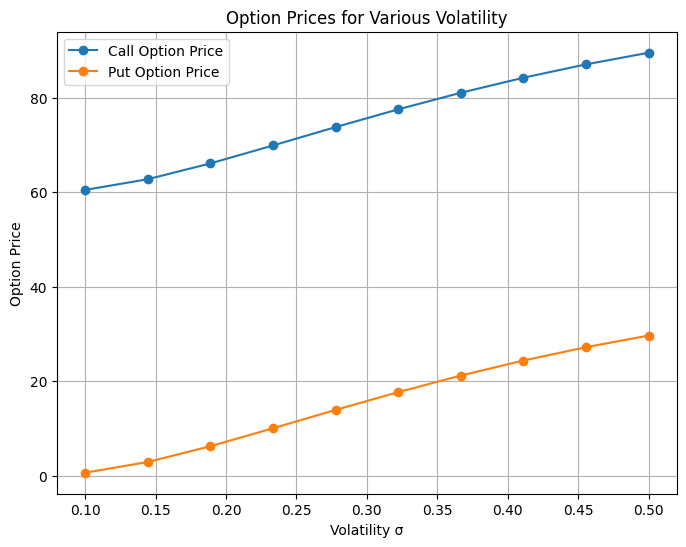

In [147]:
plt.figure(figsize=(8,6))
plt.plot(sigma, call_prices, label='Call Option Price', marker='o')
plt.plot(sigma, put_prices, label='Put Option Price', marker='o')
plt.xlabel('Volatility σ')
plt.ylabel('Option Price')
plt.title('Option Prices for Various Volatility')
plt.legend()
plt.grid(True)
plt.show()

## Apple Example to check if the BS-Function is correct
### We are selecting AAPL Sep 2024 180.000 call(AAPL240913C00180000) and AAPL Sep 2024 180.000 put (AAPL240913P00180000) (Expiry = 2024-09-13)
1. The parameters are taken from yfin
2. Current Call Last price = 41.10 and and Put Last Price = 0.05

In [148]:
# Apple Example
S = 220.82  
K = 180  
ttm = 7 / 365 
r = 0.05  
sigma_call = 0.6388 
sigma_put = 0.6243  

real_call_price_simulated = black_scholes(S, K, ttm, r, sigma_call, "call")
real_put_price_simulated = black_scholes(S, K, ttm, r, sigma_put, "put")

real_call_price_simulated, real_put_price_simulated

(41.053108382807466, 0.05045473180201032)

In [149]:
def generate_data(num_samples=10000):
    # fixed range 
    time_to_maturity_values = [0.25/12, 1/12, 3/12, 6/12, 9/12, 1, 2, 3] 
    volatility_values = [0.25, 0.5, 0.75] 
    interest_rate_values = [0.04, 0.045, 0.05]  

    # Generate dataset 
    data = []
    for T in time_to_maturity_values:
        for sigma in volatility_values:
            for r in interest_rate_values:
                for _ in range(num_samples):  
                    # Randomize stock price and strike price
                    S = np.random.uniform(50, 300) 
                    X = np.random.uniform(50, 300)  
                    option_type = "call"
                    
                    option_price = black_scholes(S, X, T, r, sigma, option_type)
                    data.append([round(S, 4), round(X, 4), round(T, 4), round(r, 4), round(sigma, 4), option_type, round(option_price, 4)])
    
    # to df
    df = pd.DataFrame(data, columns=["Stock Price", "Strike Price", "Time to Maturity", "Risk-Free Rate", "Volatility", "Option Type", "Option Price"]) 
    return df

# Generated data df
df =  generate_data(num_samples=10000)
df.to_csv('generated_call_options_data.csv')

In [150]:
def generate_pinn_data(num_samples=10000):
    # Stock price range
    S_min, S_max = 50, 300
    # Time to maturity range
    T_min, T_max = 0.01, 3  # Avoid zero to prevent division by zero

    # Generate random inputs within the ranges
    S = np.random.uniform(S_min, S_max, num_samples)
    T = np.random.uniform(T_min, T_max, num_samples)

    # Fixed parameters
    sigma = 0.2  # Volatility
    r = 0.05     # Risk-free rate
    X = 175      # Strike price

    # Calculate option prices using the Black-Scholes formula
    option_prices = black_scholes(S, X, T, r, sigma, option_type="call")

    # Create a DataFrame
    df = pd.DataFrame({
        "Stock Price": S,
        "Time to Maturity": T,
        "Strike Price": X,
        "Risk-Free Rate": r,
        "Volatility": sigma,
        "Option Price": option_prices
    })

    return df
df_pinn = generate_pinn_data(num_samples=10000)


In [183]:
df_pinn

,Stock Price,Time to Maturity,Strike Price,Risk-Free Rate,Volatility,Option Price
0,205.514220,2.974604,175,0.05,0.2,6.077441e+01
1,54.792838,0.122864,175,0.05,0.2,1.111317e-61
2,245.988998,0.206844,175,0.05,0.2,7.278980e+01
3,103.818243,0.262554,175,0.05,0.2,8.742274e-07
4,177.222780,0.495712,175,0.05,0.2,1.336032e+01
...,...,...,...,...,...,...
9995,193.381665,2.308708,175,0.05,0.2,4.484319e+01
9996,275.444170,2.195071,175,0.05,0.2,1.193075e+02
9997,260.495855,1.824861,175,0.05,0.2,1.015182e+02
9998,237.272994,0.455868,175,0.05,0.2,6.628559e+01


In [151]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Step 1: Preprocessing the Data

In [152]:
# I/O selection
X = df[["Stock Price", "Strike Price", "Time to Maturity", "Risk-Free Rate", "Volatility"]]
y = df["Option Price"]

In [153]:
# Split the data into training and test data      
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)      


In [154]:
# Scaler

# Initialize scaler 
scaler = StandardScaler()

# Fit and transform the training data       
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data               
X_test_scaled = scaler.transform(X_test)

In [155]:
## Build a Neural Network

# Define model 
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))

# Summary
model.summary()

/Users/karandeepsonewane/Library/Python/3.11/lib/python/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_58 (Dense)                │ (None, 256)            │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 42,753 (167.00 KB)

 Trainable params: 42,753 (167.00 KB)

 Non-trainable params: 0 (0.00 B)

In [156]:
# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
  839/16200 ━━━━━━━━━━━━━━━━━━━━ 10s 690us/step - loss: 1251.4133

16200/16200 ━━━━━━━━━━━━━━━━━━━━ 11s 640us/step - loss: 117.2588 - val_loss: 0.2740
Epoch 2/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 14s 872us/step - loss: 0.2783 - val_loss: 0.1010
Epoch 3/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 12s 715us/step - loss: 0.2524 - val_loss: 0.0437
Epoch 4/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 10s 605us/step - loss: 0.1853 - val_loss: 0.0292
Epoch 5/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 11s 701us/step - loss: 0.1484 - val_loss: 0.0460
Epoch 6/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 10s 610us/step - loss: 0.1166 - val_loss: 0.0501
Epoch 7/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 12s 733us/step - loss: 0.0961 - val_loss: 0.0230
Epoch 8/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 10s 606us/step - loss: 0.0924 - val_loss: 0.0280
Epoch 9/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 12s 730us/step - loss: 0.0855 - val_loss: 0.0390
Epoch 10/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 12s 721us/step - loss: 0.0777 - val_loss: 0.0326
Epoch 11/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 10s 618us/step - loss: 0.0804 - v

# Model Evaluation

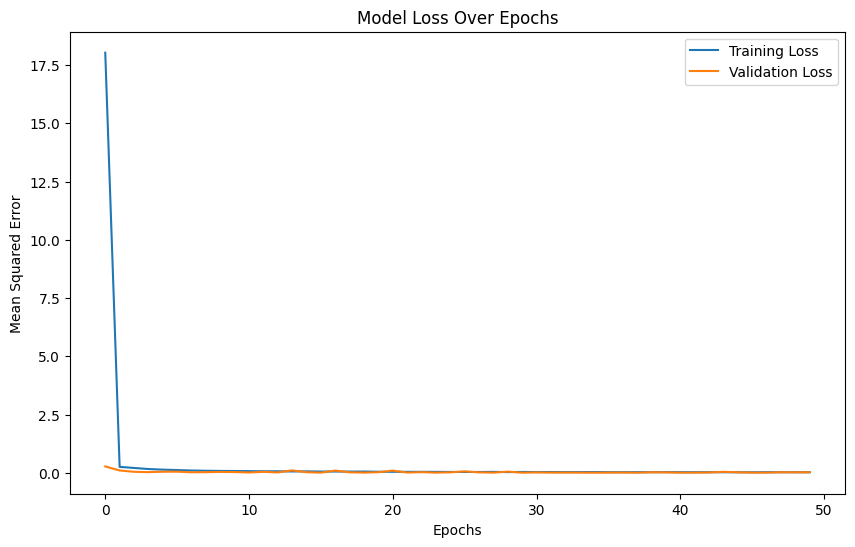

In [157]:
# Plot the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [158]:
# Predict
y_pred = model.predict(X_test_scaled)

4500/4500 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step


In [159]:
#Calculate MSE MAE
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test MAE: {mae:.4f}")


Test MSE: 0.0237
Test MAE: 0.1087


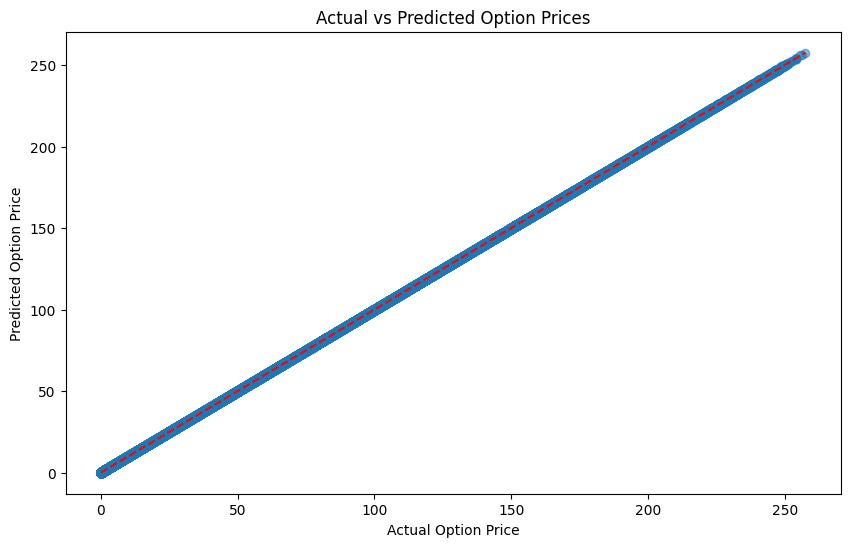

In [160]:
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.title('Actual vs Predicted Option Prices')
plt.show()


In [161]:
# Save
model.save('black_scholes_nn_model.h5')


In [162]:
from tensorflow.keras import backend as K
from tensorflow.keras.initializers import RandomUniform
from tensorflow.keras.layers import Input, Dense, Layer
from tensorflow.keras.models import Model

Epoch 1/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 8s 494us/step - loss: 1388.1350 - val_loss: 118.5373
Epoch 2/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 452us/step - loss: 105.0667 - val_loss: 75.5886
Epoch 3/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 435us/step - loss: 73.7539 - val_loss: 64.3722
Epoch 4/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 451us/step - loss: 63.4760 - val_loss: 56.4754
Epoch 5/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 8s 463us/step - loss: 55.3789 - val_loss: 48.0022
Epoch 6/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 8s 475us/step - loss: 45.4185 - val_loss: 38.1837
Epoch 7/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 8s 486us/step - loss: 36.0616 - val_loss: 28.2201
Epoch 8/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 430us/step - loss: 27.6271 - val_loss: 21.9031
Epoch 9/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 428us/step - loss: 21.1824 - val_loss: 16.9301
Epoch 10/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 428us/step - loss: 17.5094 - val_loss: 15.0246
Epoch 11/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 7s 428us/s

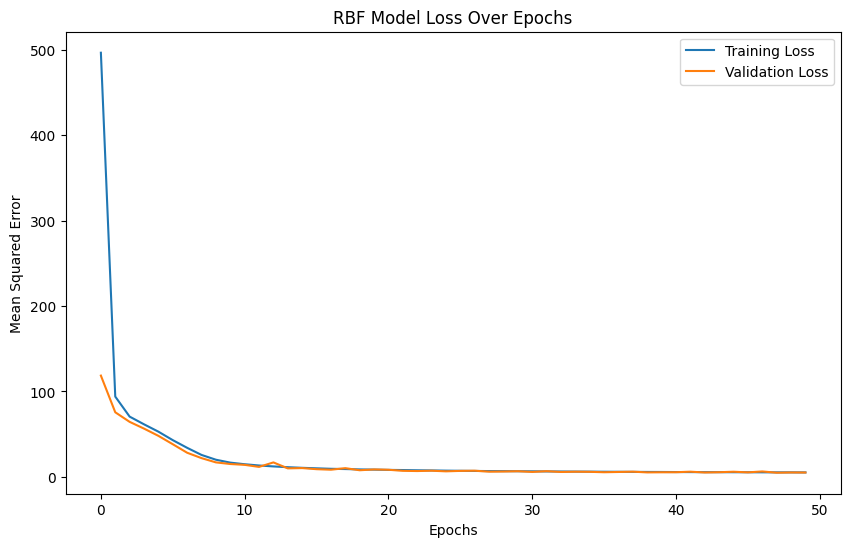

4500/4500 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step
RBF Model Test MSE: 5.0701
RBF Model Test MAE: 1.6973


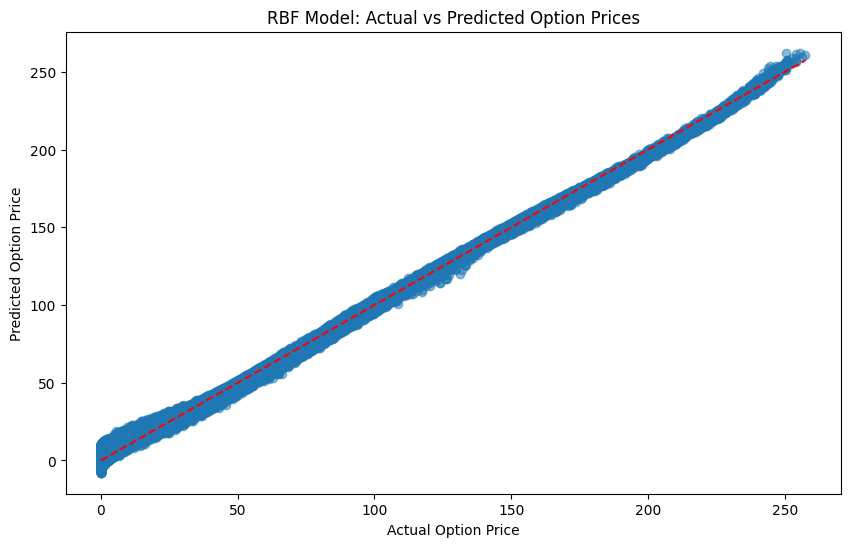

In [163]:
# Define the custom RBF layer
class RBFLayer(Layer):
    def __init__(self, units, gamma=None, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        self.centers = self.add_weight(
            name='centers',
            shape=(self.units, input_shape[-1]),
            initializer=RandomUniform(minval=-1, maxval=1),
            trainable=True
        )
        self.betas = self.add_weight(
            name='betas',
            shape=(self.units,),
            initializer='ones',
            trainable=True
        )
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        C = K.expand_dims(self.centers, axis=0)
        H = K.expand_dims(inputs, axis=1)
        distances = K.sum((H - C) ** 2, axis=-1)
        
        if self.gamma is None:
            gamma = self.betas
        else:
            gamma = self.gamma
        return K.exp(-gamma * distances)

# Build the RBF model
inputs = Input(shape=(X_train_scaled.shape[1],))
rbf_layer = RBFLayer(units=64)(inputs)
output = Dense(1, activation='linear')(rbf_layer)

rbf_model = Model(inputs=inputs, outputs=output)
rbf_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
rbf_history = rbf_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)

# Evaluate the model
plt.figure(figsize=(10,6))
plt.plot(rbf_history.history['loss'], label='Training Loss')
plt.plot(rbf_history.history['val_loss'], label='Validation Loss')
plt.title('RBF Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

y_pred_rbf = rbf_model.predict(X_test_scaled)
mse_rbf = mean_squared_error(y_test, y_pred_rbf)
mae_rbf = mean_absolute_error(y_test, y_pred_rbf)

print(f"RBF Model Test MSE: {mse_rbf:.4f}")
print(f"RBF Model Test MAE: {mae_rbf:.4f}")

plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_rbf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.title('RBF Model: Actual vs Predicted Option Prices')
plt.show()

# Save the model (optional)
rbf_model.save('black_scholes_rbf_model.h5')

# ResNet

In [164]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Add, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LayerNormalization

In [165]:
# Define residual blocks for the model
def residual_block(x, units):
    """
    Defines a residual block with two Dense layers and a skip connection.

    Parameters:
    - x: Input tensor
    - units: Number of neurons in each dense layer

    Returns:
    - Output tensor after applying the residual block
    """
    shortcut = x  # Save the input tensor for the skip connection

    # First layer in the block
    x = Dense(units, activation='relu')(x)
    x = LayerNormalization()(x)  # Optional: Layer normalization

    # Second layer in the block
    x = Dense(units, activation=None)(x)
    x = LayerNormalization()(x)  # Optional: Layer normalization

    # Add the skip connection
    x = Add()([shortcut, x])
    x = Activation('relu')(x)

    return x


In [166]:
# Contruct the Model using Residual Block
# input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# First Dense layer before residual blocks
x = Dense(64, activation='relu')(inputs)
x = LayerNormalization()(x)

# multiple residual blocks
for _ in range(3):  # Number of residual blocks
    x = residual_block(x, units=64)

# Output layer
output = Dense(1, activation='linear')(x)

# Create the model
resnet_model = Model(inputs=inputs, outputs=output)

# Compile the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')


In [167]:
# Train the model
resnet_history = resnet_model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.1,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 17s 898us/step - loss: 352.6954 - val_loss: 0.2664
Epoch 2/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 14s 833us/step - loss: 0.5964 - val_loss: 0.4969
Epoch 3/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 830us/step - loss: 0.3596 - val_loss: 0.2950
Epoch 4/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 824us/step - loss: 0.2965 - val_loss: 0.0620
Epoch 5/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 824us/step - loss: 0.2073 - val_loss: 0.2154
Epoch 6/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 818us/step - loss: 0.1545 - val_loss: 0.0280
Epoch 7/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 816us/step - loss: 0.1431 - val_loss: 0.1074
Epoch 8/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 825us/step - loss: 0.1351 - val_loss: 0.0434
Epoch 9/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 826us/step - loss: 0.1020 - val_loss: 0.0530
Epoch 10/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 13s 829us/step - loss: 0.1065 - val_loss: 0.0586
Epoch 11/50
16200/16200 ━━━━━━━━━━━━━━━━━━━━ 14s 836us/step - loss:

## Model Evaluation 

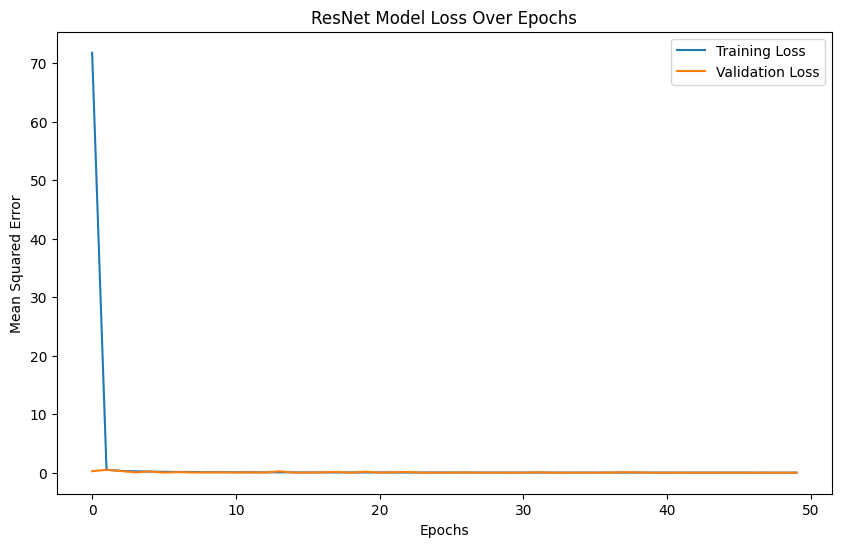

In [168]:
# Plot the training and validation loss
plt.figure(figsize=(10,6))
plt.plot(resnet_history.history['loss'], label='Training Loss')
plt.plot(resnet_history.history['val_loss'], label='Validation Loss')
plt.title('ResNet Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()


In [169]:
# Predict on the test set
y_pred_resnet = resnet_model.predict(X_test_scaled)


4500/4500 ━━━━━━━━━━━━━━━━━━━━ 2s 474us/step


In [170]:
# Calculate Mean Squared Error and Mean Absolute Error
mse_resnet = mean_squared_error(y_test, y_pred_resnet)
mae_resnet = mean_absolute_error(y_test, y_pred_resnet)

print(f"ResNet Model Test MSE: {mse_resnet:.4f}")
print(f"ResNet Model Test MAE: {mae_resnet:.4f}")


ResNet Model Test MSE: 0.0120
ResNet Model Test MAE: 0.0710


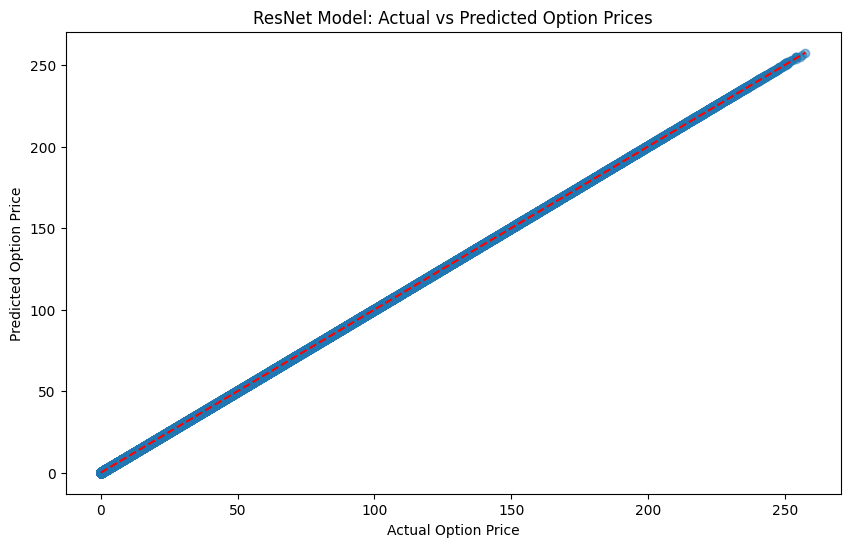

In [171]:
# Plot actual vs predicted option prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred_resnet, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.title('ResNet Model: Actual vs Predicted Option Prices')
plt.show()


# Physics Informed Neural Network

In [172]:
import tensorflow as tf

In [173]:
# Input features and target variable
X_pinn = df_pinn[["Stock Price", "Time to Maturity"]].values  # S and t
y_pinn = df_pinn["Option Price"].values.reshape(-1, 1)

# Split into training and testing sets
X_train_pinn, X_test_pinn, y_train_pinn, y_test_pinn = train_test_split(X_pinn, y_pinn, test_size=0.2, random_state=42)

# Feature scaling
scaler_X = StandardScaler()
X_train_pinn_scaled = scaler_X.fit_transform(X_train_pinn)
X_test_pinn_scaled = scaler_X.transform(X_test_pinn)

scaler_y = StandardScaler()
y_train_pinn_scaled = scaler_y.fit_transform(y_train_pinn)
y_test_pinn_scaled = scaler_y.transform(y_test_pinn)


## Building PINN Model


In [174]:
#input layer
input_S_t = Input(shape=(2,))  # S and t

# Hidden layers
x = Dense(64, activation='tanh')(input_S_t)
x = Dense(64, activation='tanh')(x)
x = Dense(64, activation='tanh')(x)

# Output layer
output_V = Dense(1, activation='linear')(x)

# model
pinn_model = Model(inputs=input_S_t, outputs=output_V)


Define the Custom Loss Function
We need a loss function that includes:

1. Data Loss (𝐿_data): The mean squared error between the predicted and true option prices.
2. PDE Loss (𝐿_PDE): The mean squared error of the Black-Scholes PDE residual.

In [175]:
# Fixed parameters
sigma = 0.2
r = 0.05
X = 175  # Strike price

# PINN model subclassing tf.keras.Model
class PINNModel(tf.keras.Model):
    def __init__(self):
        super(PINNModel, self).__init__()
        # Define the layers
        self.dense1 = Dense(64, activation='tanh')
        self.dense2 = Dense(64, activation='tanh')
        self.dense3 = Dense(64, activation='tanh')
        self.out = Dense(1, activation='linear')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        x = self.dense3(x)
        V = self.out(x)
        return V

    def train_step(self, data):
        inputs, y_true = data

        with tf.GradientTape(persistent=True) as tape:
            tape.watch(inputs)
            V = self(inputs, training=True)

            # Compute data loss
            data_loss = tf.reduce_mean(tf.square(y_true - V))

            # Compute PDE residuals
            V_S_t = tape.gradient(V, inputs)
            V_S = V_S_t[:, 0:1]
            V_t = V_S_t[:, 1:2]
            V_SS = tape.gradient(V_S, inputs)[:, 0:1]
            S = inputs[:, 0:1]

            # Black-Scholes PDE residual
            residual = V_t + 0.5 * sigma**2 * S**2 * V_SS + r * S * V_S - r * V

            # PDE loss
            pde_loss = tf.reduce_mean(tf.square(residual))

            # Total loss
            total_loss = data_loss + pde_loss

        # Compute gradients
        grads = tape.gradient(total_loss, self.trainable_variables)

        # Update weights
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

        # Return loss metrics
        return {'loss': total_loss, 'data_loss': data_loss, 'pde_loss': pde_loss}

    def test_step(self, data):
        inputs, y_true = data
        V = self(inputs, training=False)
        data_loss = tf.reduce_mean(tf.square(y_true - V))
        return {'loss': data_loss}


In [176]:
pinn_model.compile(optimizer=Adam(learning_rate=0.001), loss=pinn_loss)


In [177]:
# Instantiate and compile the model
pinn_model = PINNModel()
pinn_model.compile(optimizer=Adam(learning_rate=0.001))

# Train the model
history = pinn_model.fit(
    X_train_pinn_scaled,
    y_train_pinn_scaled,
    validation_split=0.1,
    epochs=50,
    batch_size=64,
    verbose=1
)



Epoch 1/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - data_loss: 0.1231 - loss: 0.1320 - pde_loss: 0.0089 - val_loss: 0.0000e+00
Epoch 2/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 805us/step - data_loss: 0.0150 - loss: 0.0230 - pde_loss: 0.0080 - val_loss: 0.0000e+00
Epoch 3/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - data_loss: 0.0087 - loss: 0.0158 - pde_loss: 0.0071 - val_loss: 0.0000e+00
Epoch 4/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - data_loss: 0.0083 - loss: 0.0152 - pde_loss: 0.0069 - val_loss: 0.0000e+00
Epoch 5/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - data_loss: 0.0080 - loss: 0.0150 - pde_loss: 0.0069 - val_loss: 0.0000e+00
Epoch 6/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 809us/step - data_loss: 0.0080 - loss: 0.0149 - pde_loss: 0.0069 - val_loss: 0.0000e+00
Epoch 7/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - data_loss: 0.0080 - loss: 0.0148 - pde_loss: 0.0068 - val_loss: 0.0000e+00
Epoch 8/50
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - data_loss: 0.0077 - loss: 0.0

In [178]:
## Model Evaluation 

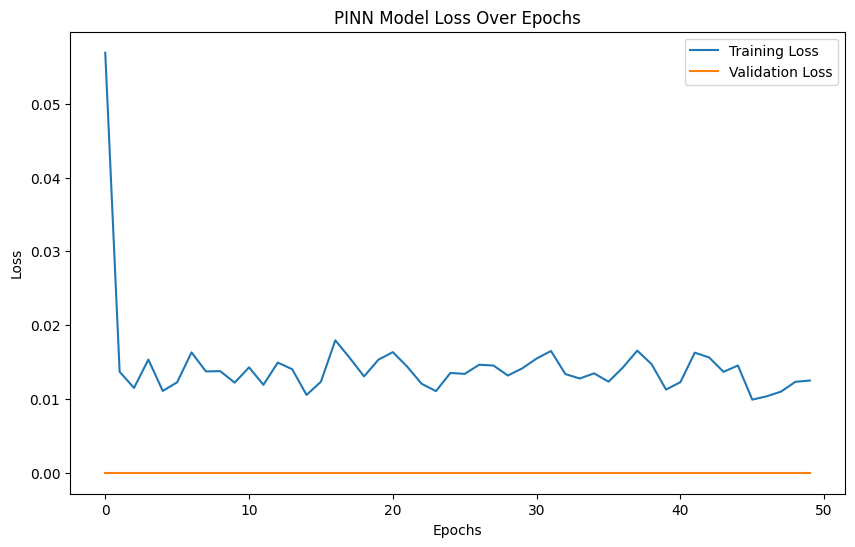

In [179]:
# Extract losses
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(10,6))
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('PINN Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [180]:
# Predict on the test set
y_pred_pinn_scaled = pinn_model.predict(X_test_pinn_scaled)

# Inverse transform the predictions
y_pred_pinn = scaler_y.inverse_transform(y_pred_pinn_scaled)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step


In [181]:
# Calculate Mean Squared Error and Mean Absolute Error
mse_pinn = mean_squared_error(y_test_pinn, y_pred_pinn)
mae_pinn = mean_absolute_error(y_test_pinn, y_pred_pinn)

print(f"PINN Model Test MSE: {mse_pinn:.4f}")
print(f"PINN Model Test MAE: {mae_pinn:.4f}")


PINN Model Test MSE: 20.6834
PINN Model Test MAE: 3.4609


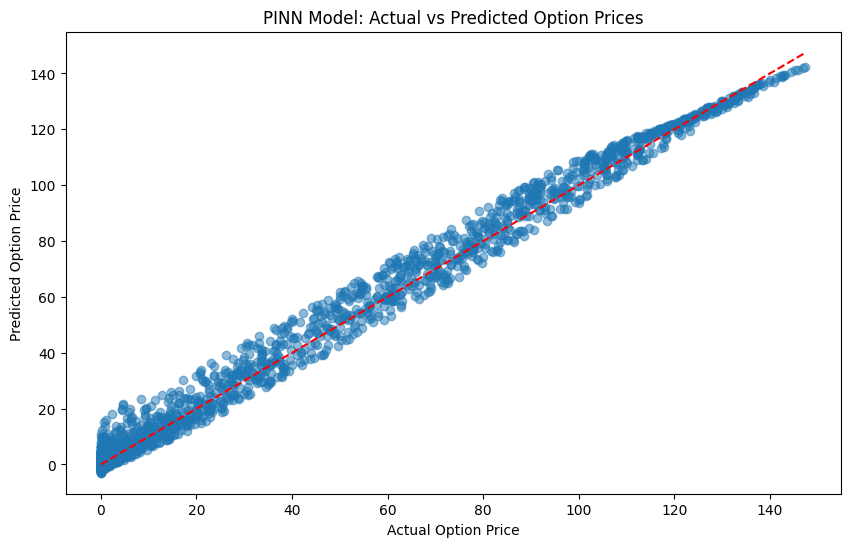

In [182]:
plt.figure(figsize=(10,6))
plt.scatter(y_test_pinn, y_pred_pinn, alpha=0.5)
plt.plot([y_test_pinn.min(), y_test_pinn.max()], [y_test_pinn.min(), y_test_pinn.max()], 'r--')
plt.xlabel('Actual Option Price')
plt.ylabel('Predicted Option Price')
plt.title('PINN Model: Actual vs Predicted Option Prices')
plt.show()
